In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##display all the columns of dataset
pd.pandas.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.shape

(1460, 81)

In [5]:
##top 5 rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
##Missing values

missing_list = [col for col in df.columns if df[col].isnull().sum()>1]

In [7]:
print('Percentage of missing values in columns : ')
for val in missing_list:
    print(val," - ", np.round(df[val].isnull().mean(),4))

Percentage of missing values in columns : 
LotFrontage  -  0.1774
Alley  -  0.9377
MasVnrType  -  0.0055
MasVnrArea  -  0.0055
BsmtQual  -  0.0253
BsmtCond  -  0.0253
BsmtExposure  -  0.026
BsmtFinType1  -  0.0253
BsmtFinType2  -  0.026
FireplaceQu  -  0.4726
GarageType  -  0.0555
GarageYrBlt  -  0.0555
GarageFinish  -  0.0555
GarageQual  -  0.0555
GarageCond  -  0.0555
PoolQC  -  0.9952
Fence  -  0.8075
MiscFeature  -  0.963


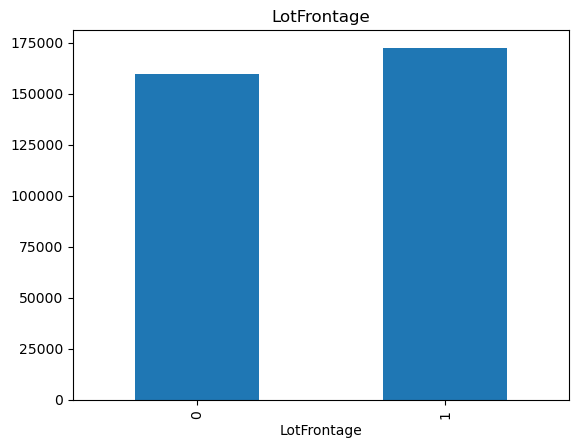

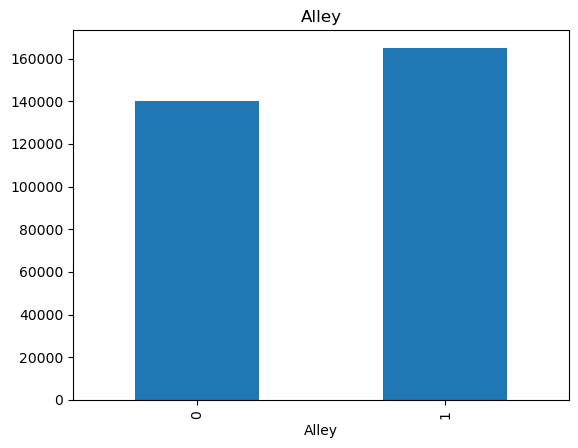

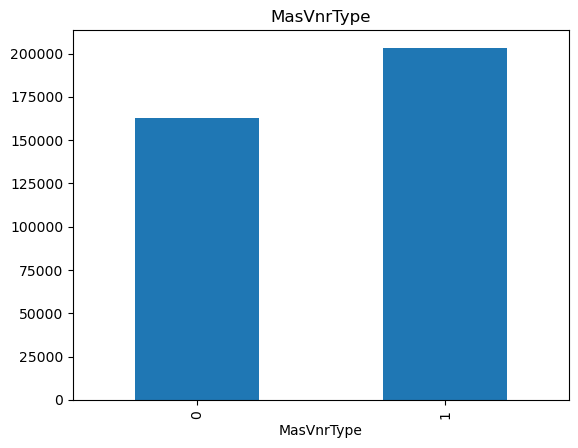

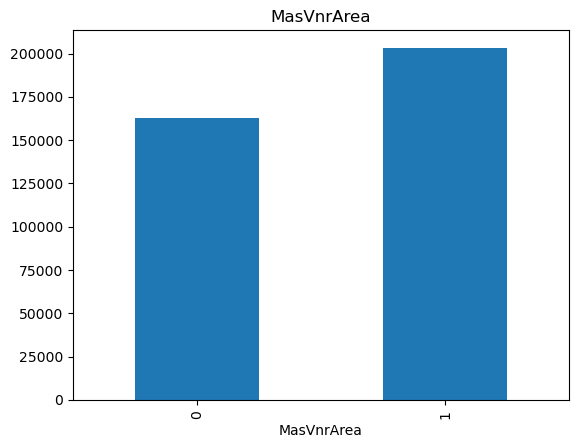

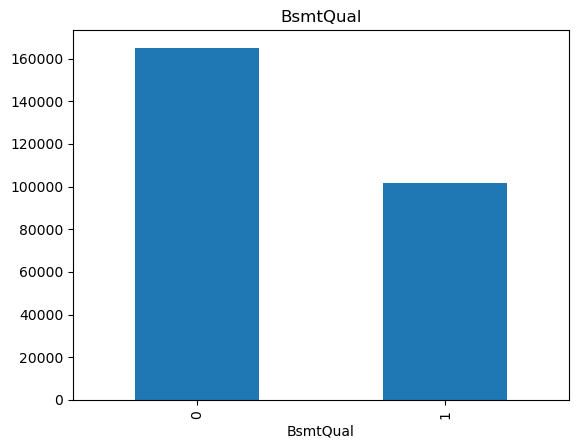

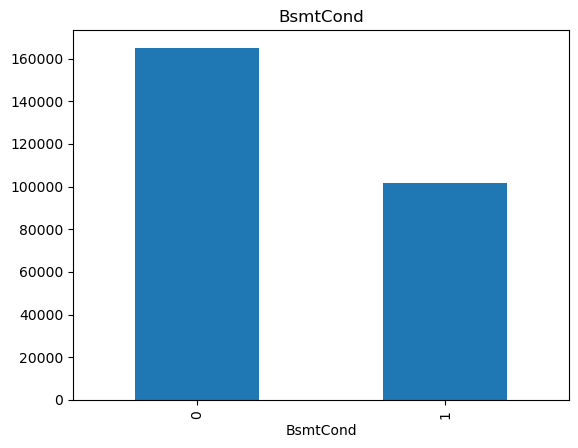

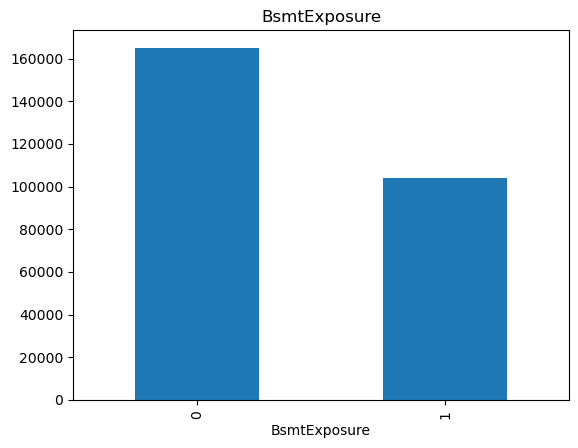

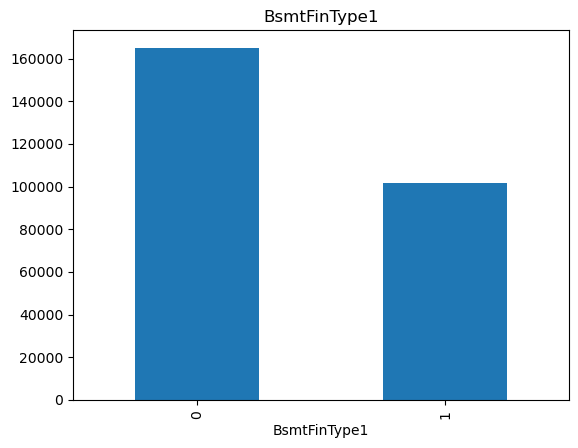

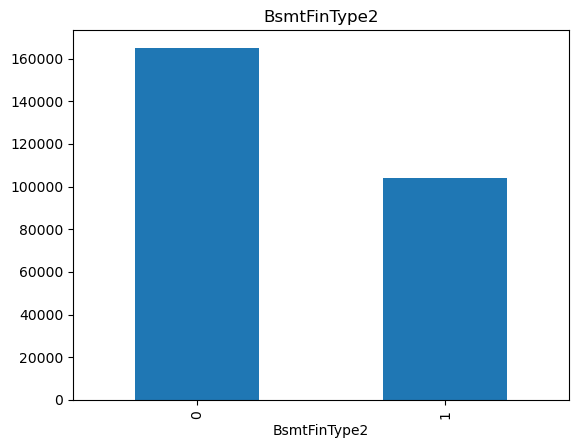

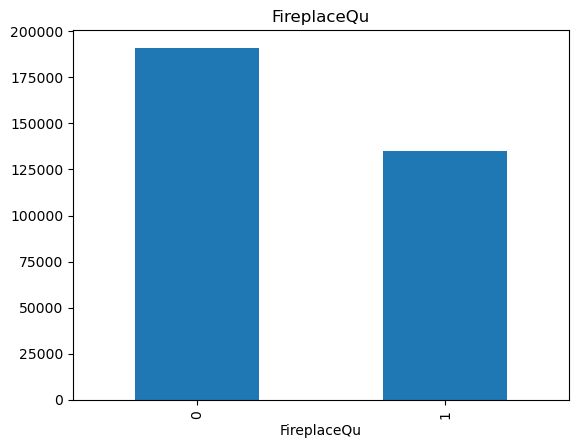

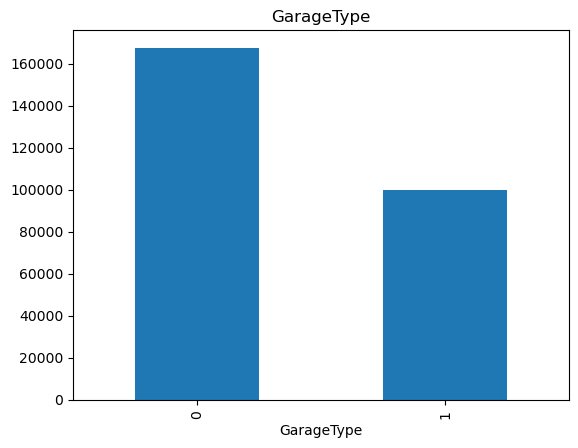

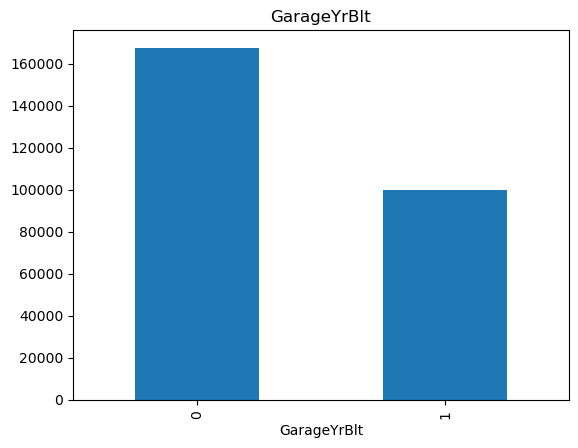

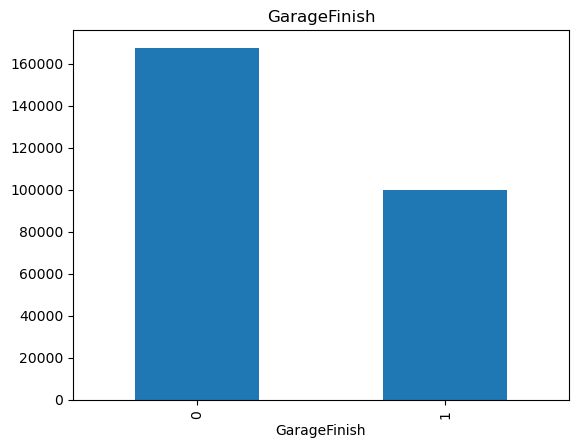

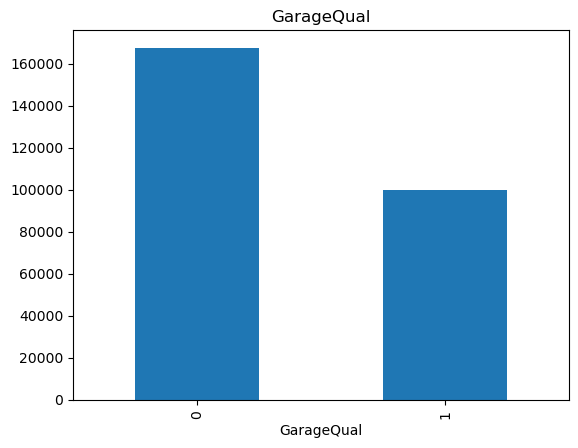

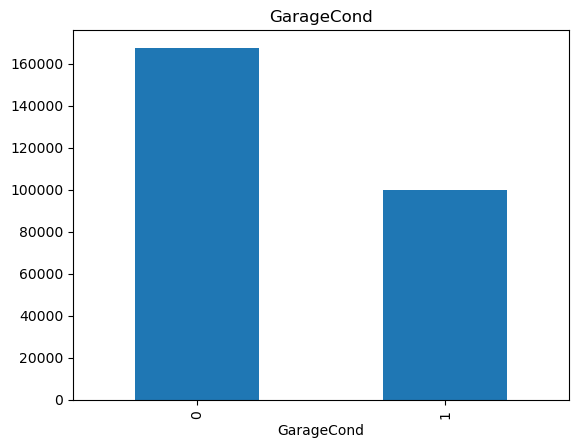

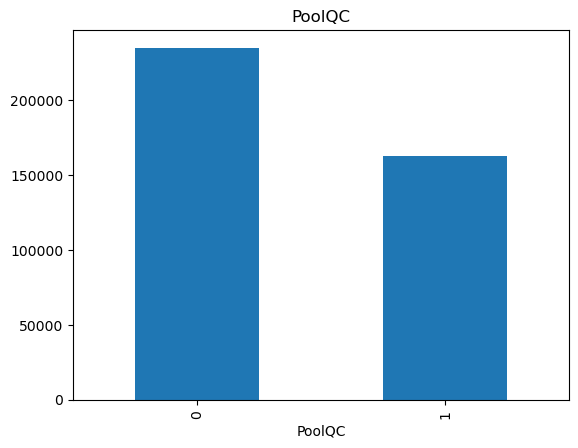

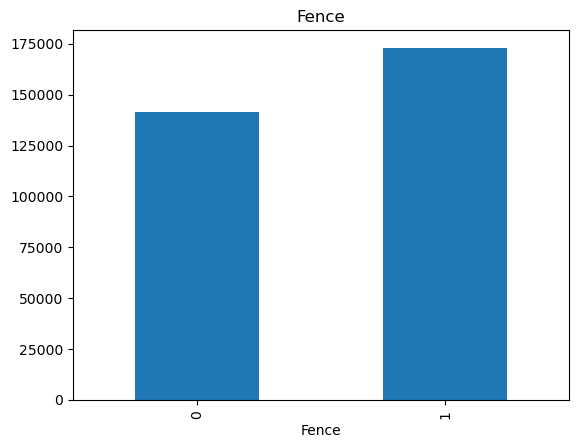

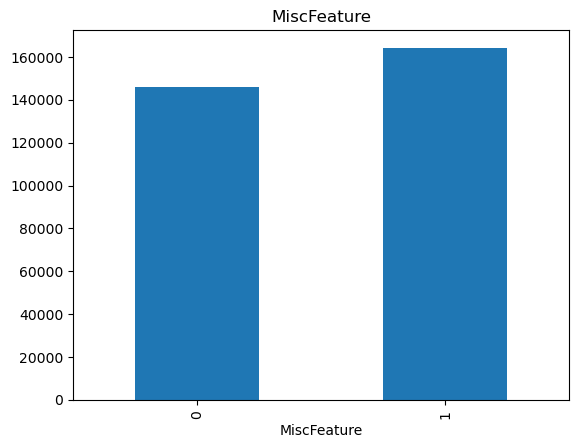

In [8]:
##Relationship between missing values and sales price

for feature in missing_list:
    data = df.copy()
    
    data[feature] = np.where(data[feature].isnull(),1,0)
    
    data.groupby(feature)['SalePrice'].median().plot(kind='bar')
    plt.title(feature)
    plt.show()

In [9]:
##Numerical Values

num_feature = [feature for feature in df.columns if df[feature].dtypes !='O']

len(num_feature)


38

In [10]:
##list of feature contain year information

year_feature = [feature for feature in df.columns if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

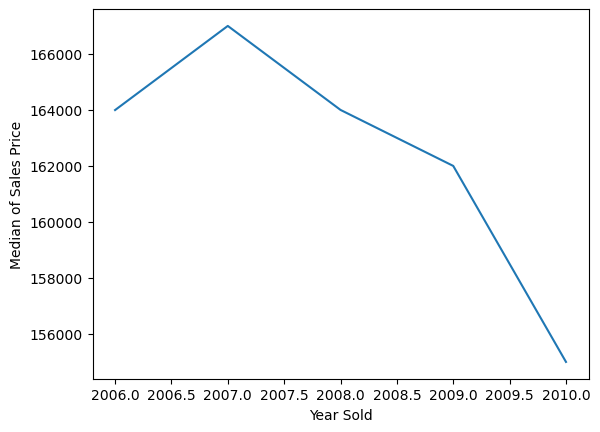

In [13]:
##analyze relation between YrSold and sales price

df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median of Sales Price')
plt.show()

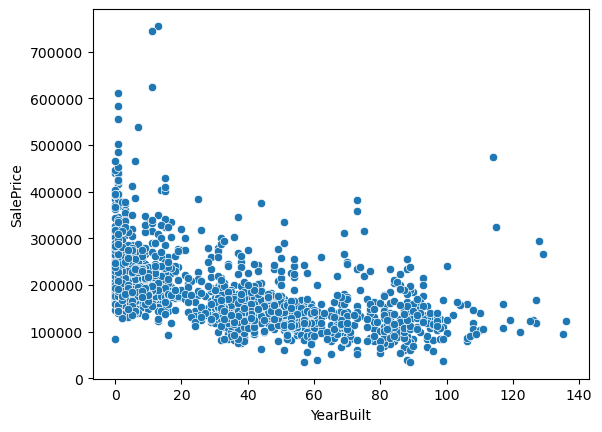

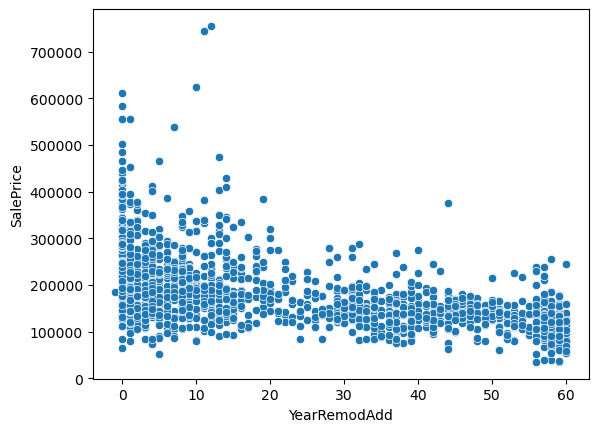

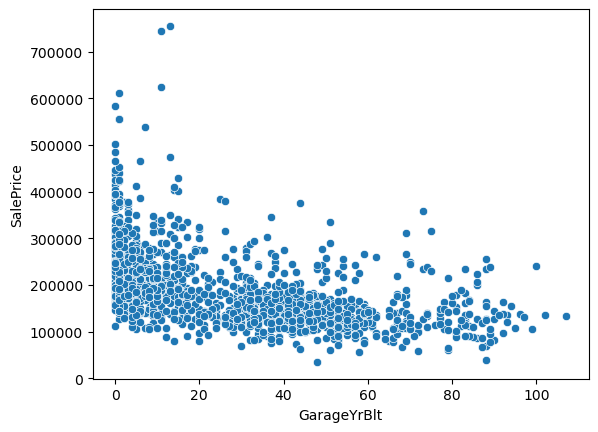

In [16]:
##comparing other time feature with sales price

for feature in year_feature:
    if feature != 'YrSold':
        data = df.copy()
        
        data[feature] = data['YrSold']-data[feature]
        
        sns.scatterplot(x=feature,y='SalePrice',data=data)
        plt.show()

In [21]:
##Seggregate discrete and continuous numerical feature

discrete_feature = [feature for feature in num_feature if df[feature].nunique()<25 and feature not in year_feature+['Id']]

len(discrete_feature)

17

In [22]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

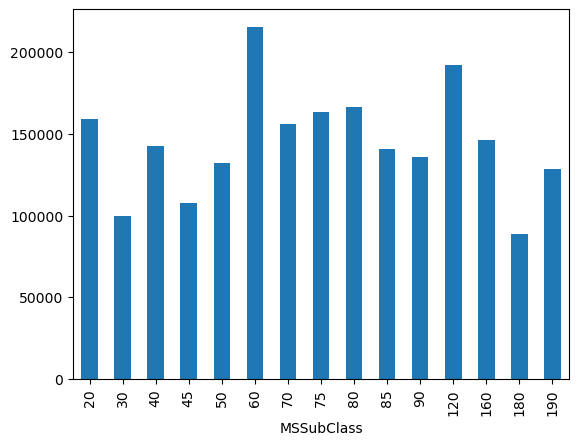

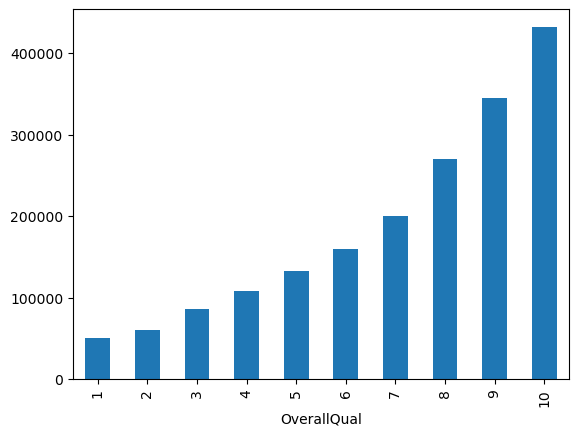

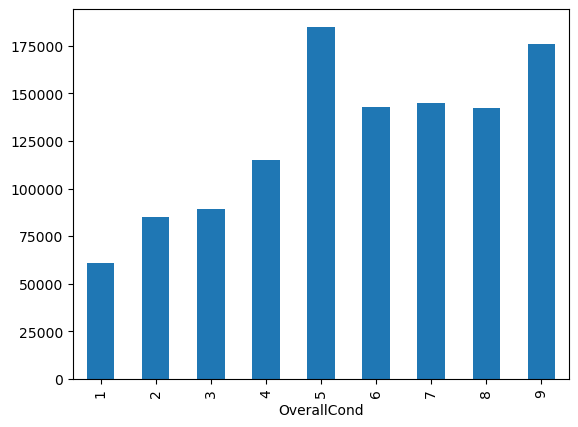

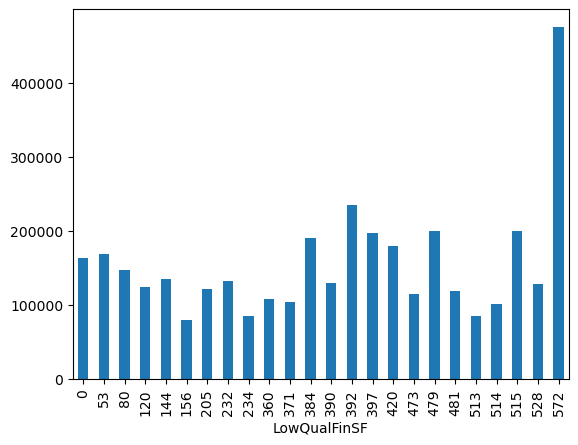

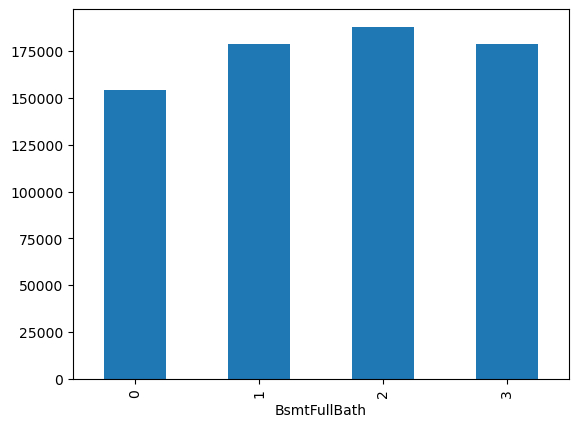

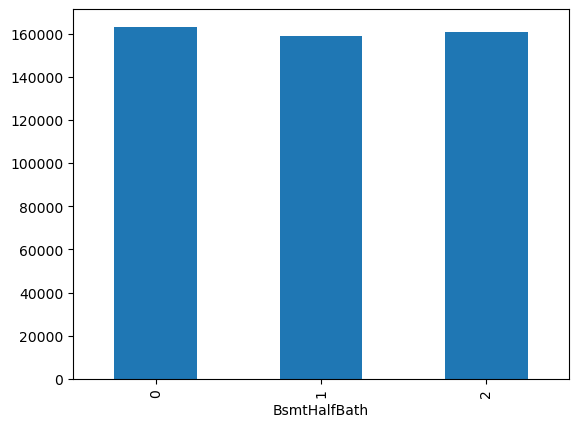

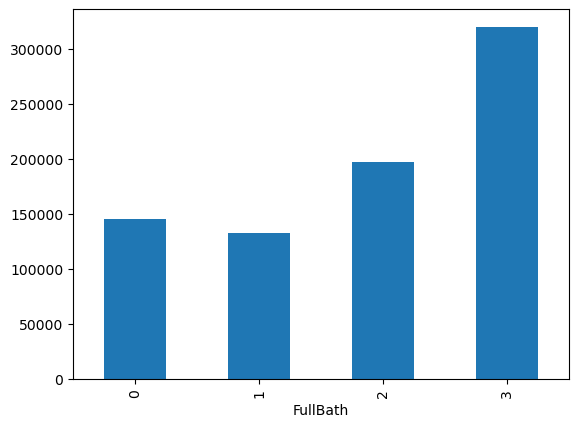

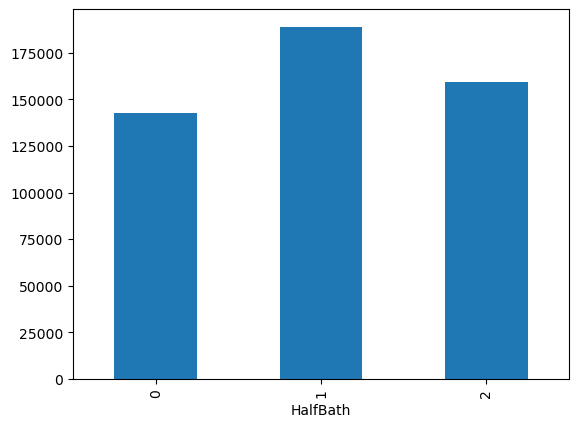

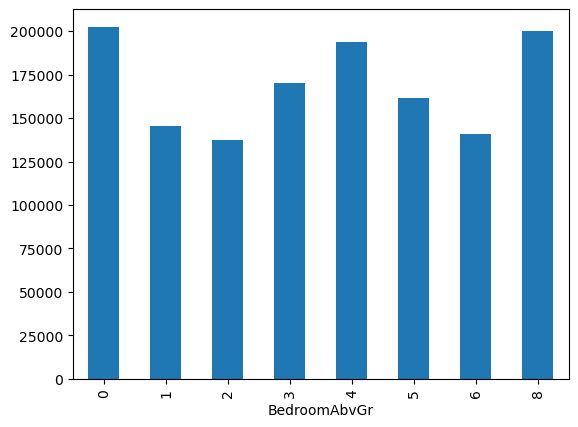

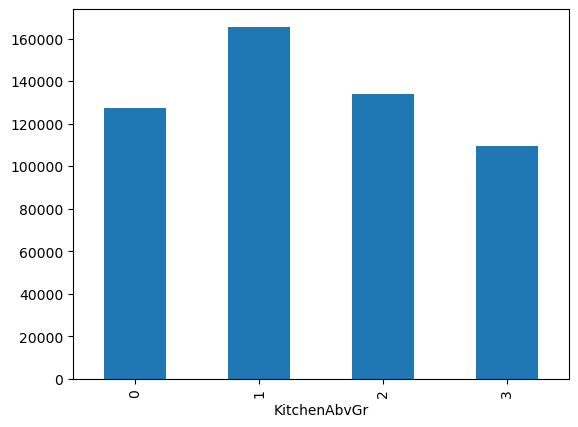

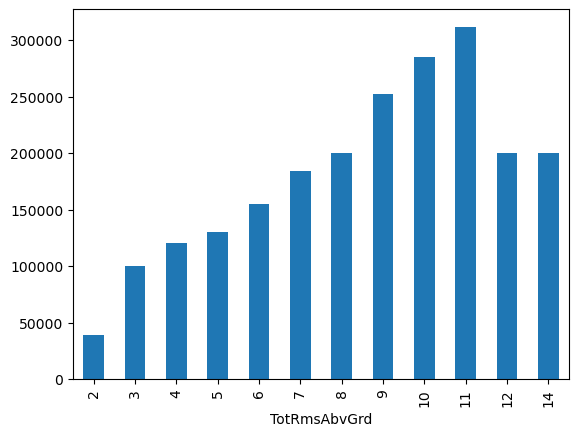

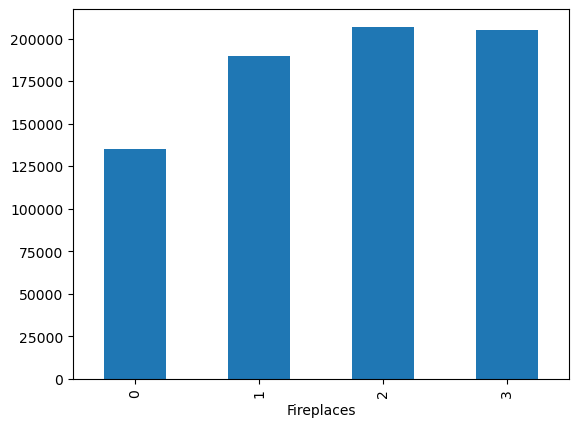

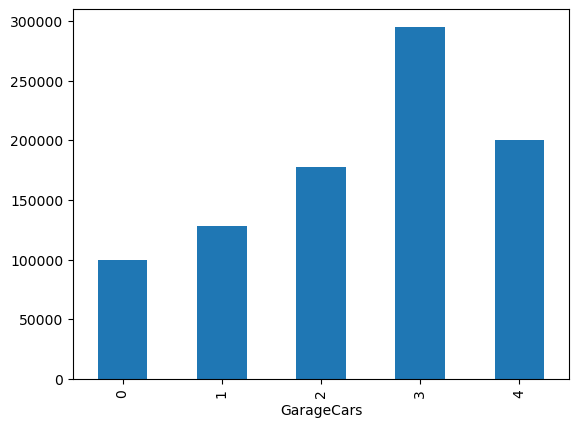

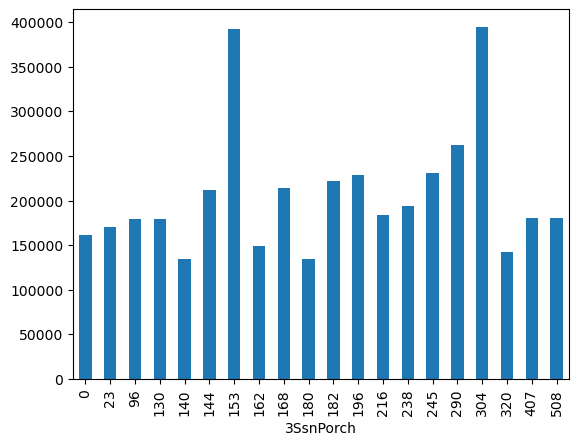

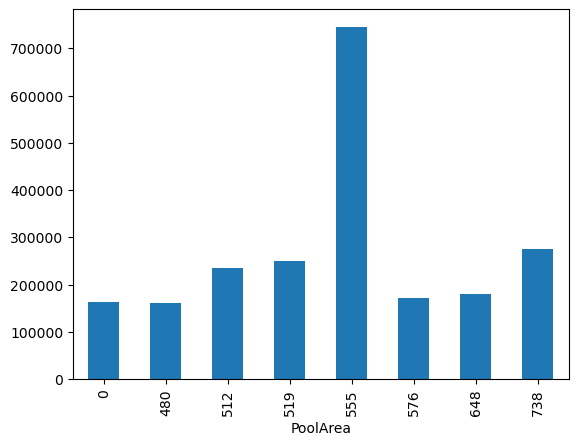

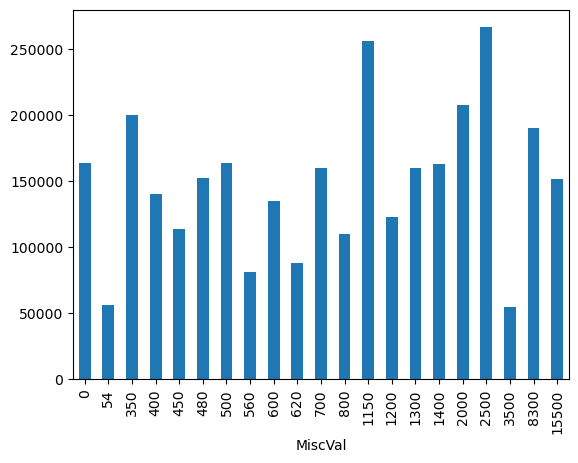

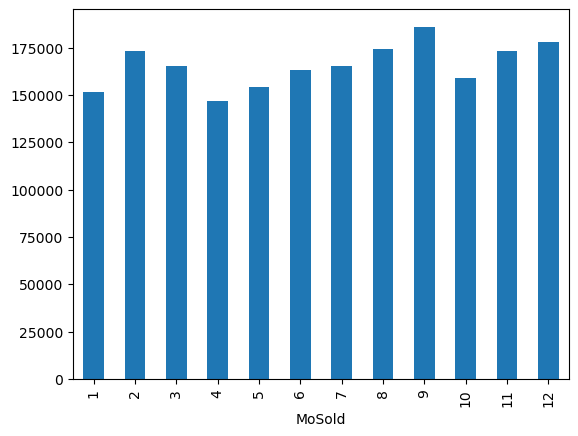

In [24]:
##relation between discrete feature and salesprice

for feature in discrete_feature:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot(kind='bar')
    plt.show()

In [26]:
##continuous features

conti_feature = [feature for feature in num_feature if feature not in discrete_feature+year_feature+['Id']]

len(conti_feature)

16

In [40]:
conti_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

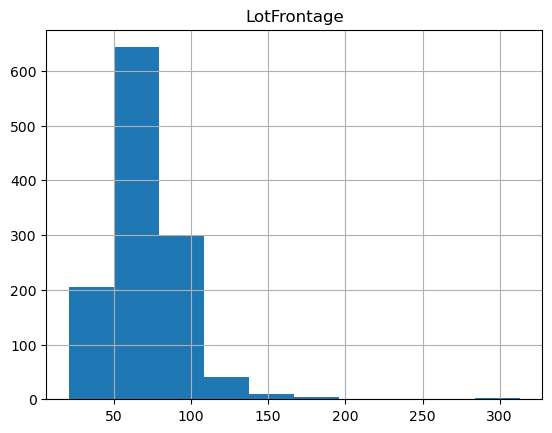

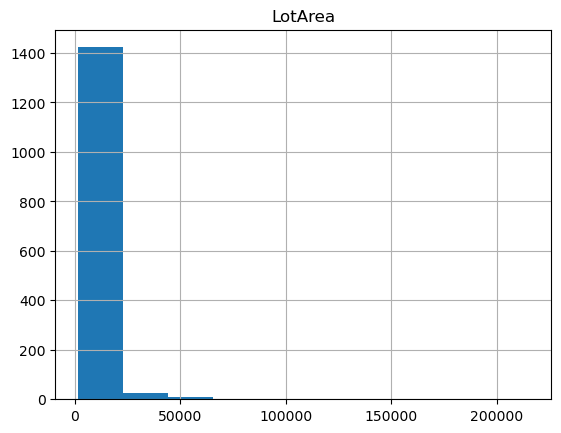

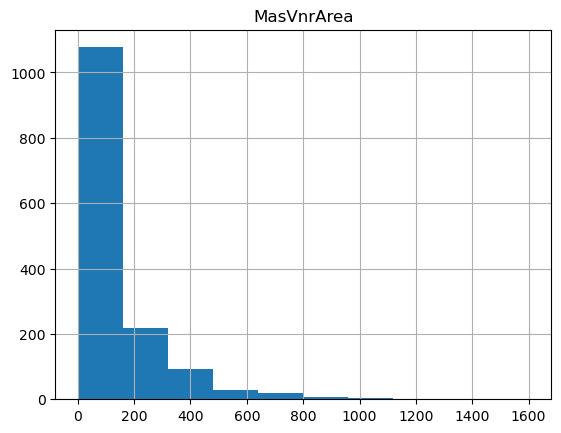

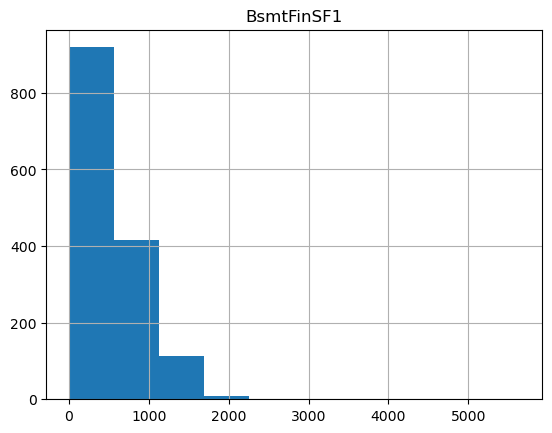

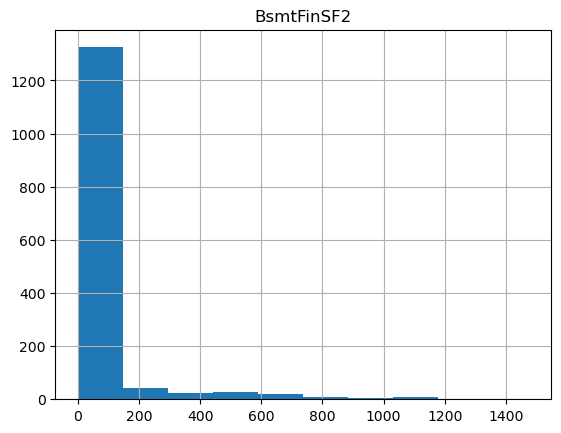

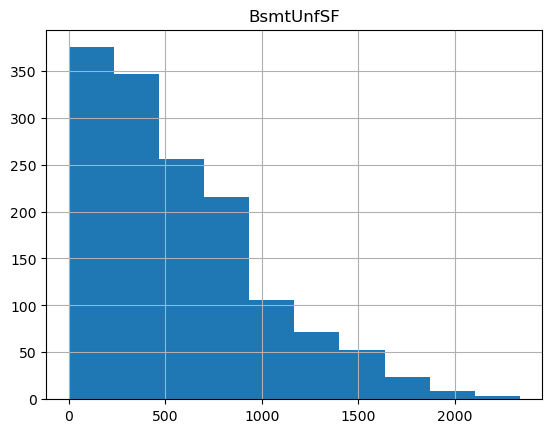

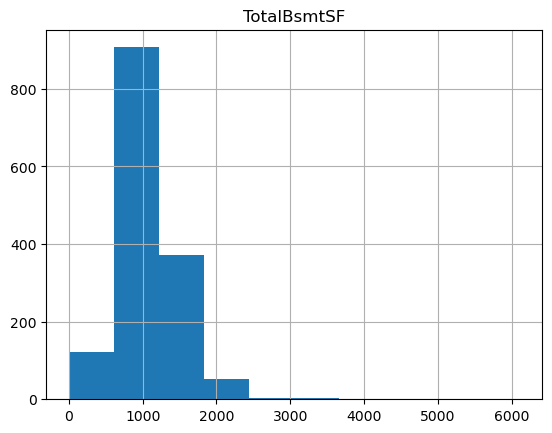

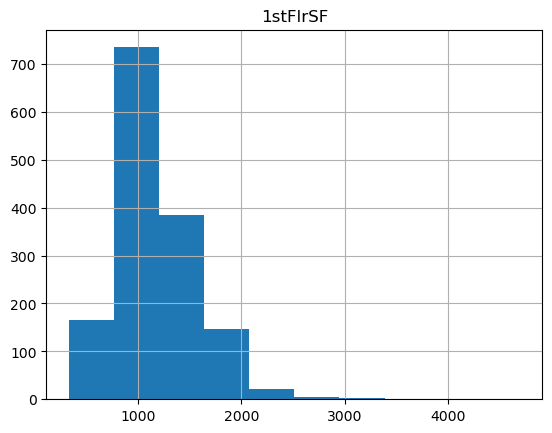

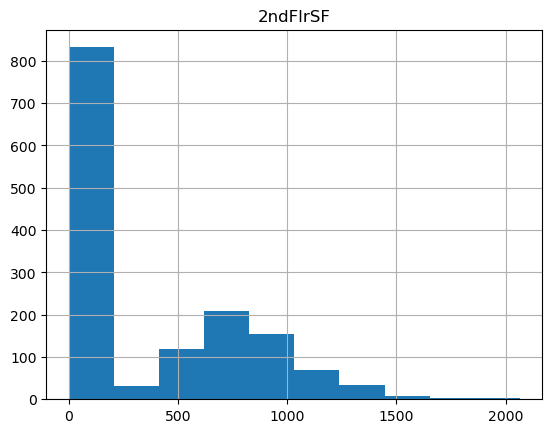

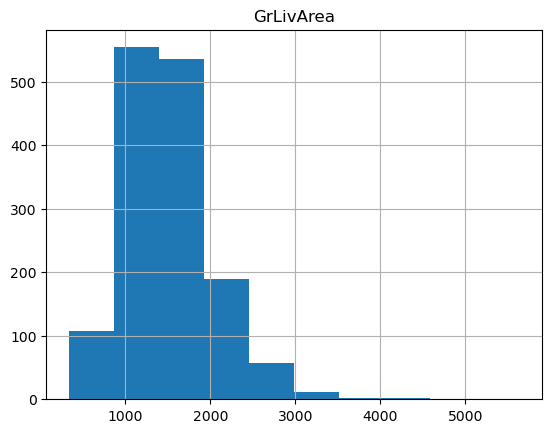

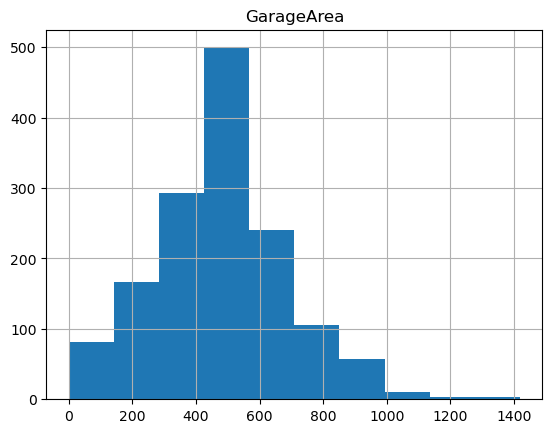

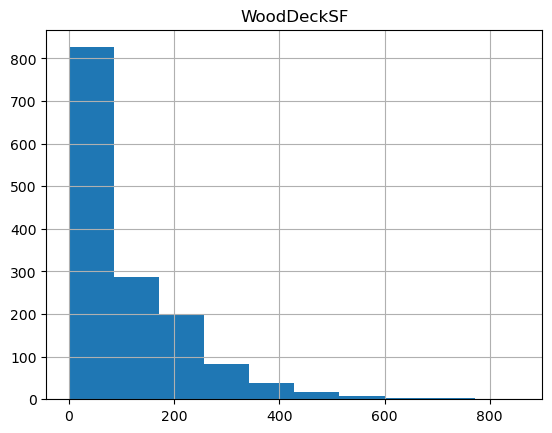

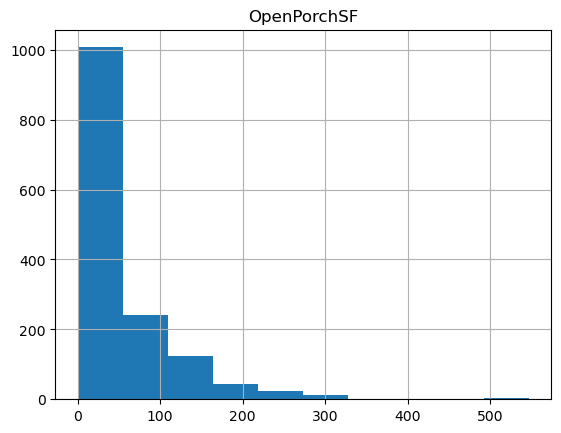

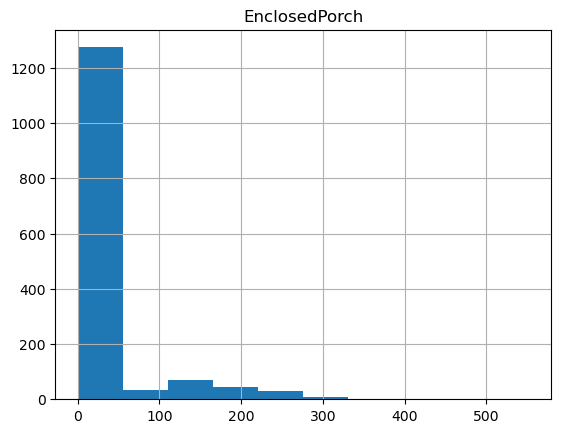

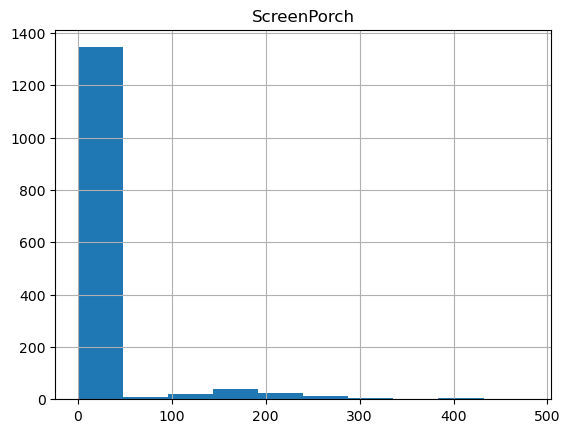

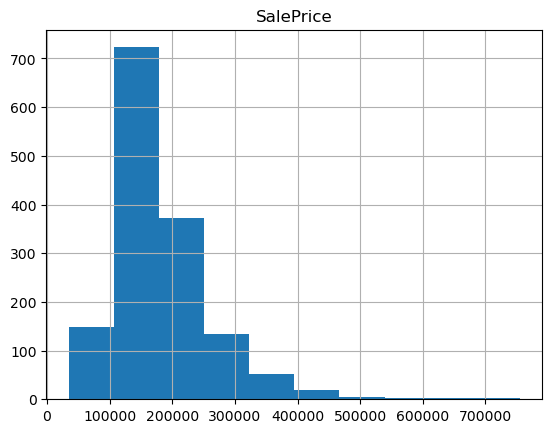

In [32]:
for feature in conti_feature:
    data = df.copy()
    data.hist(feature)
    plt.show()

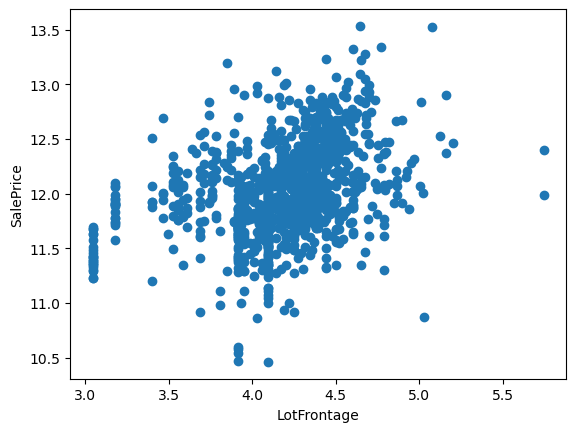

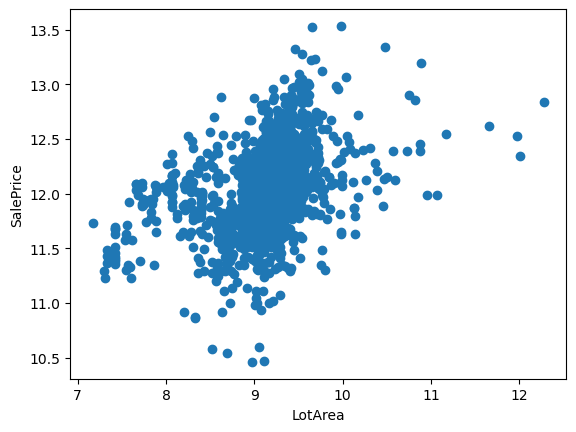

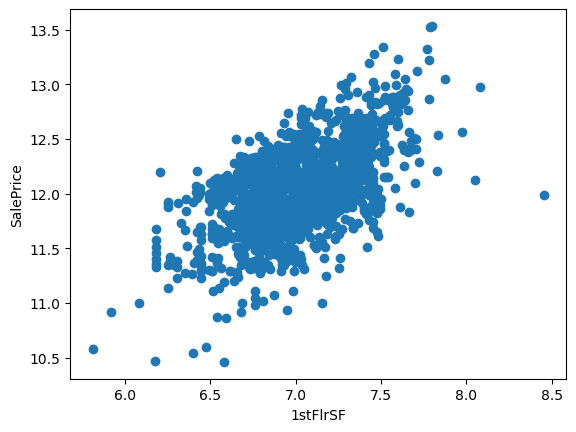

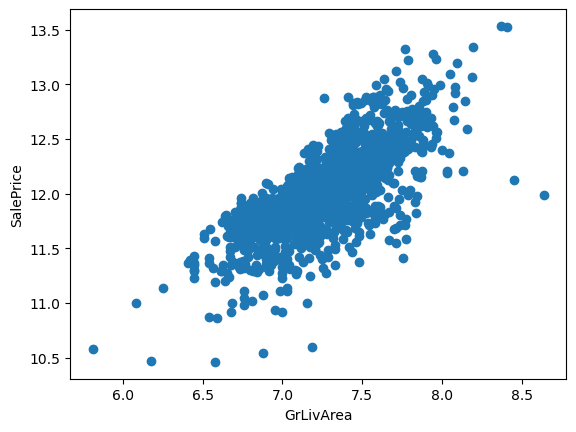

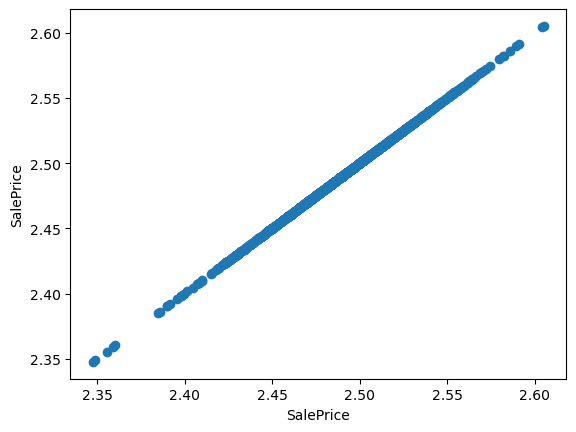

In [39]:
##using logarithmic distribution
for feature in conti_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

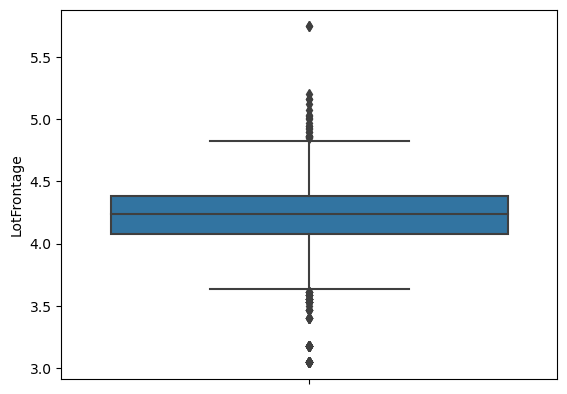

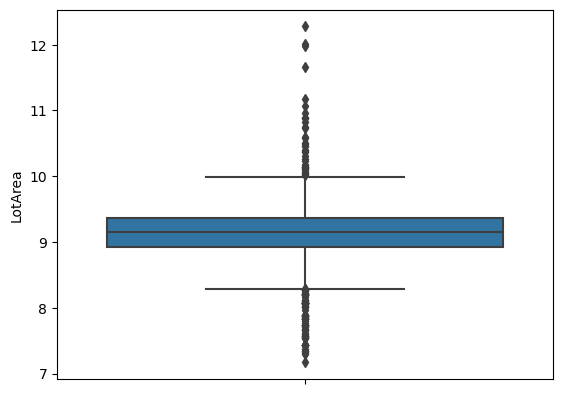

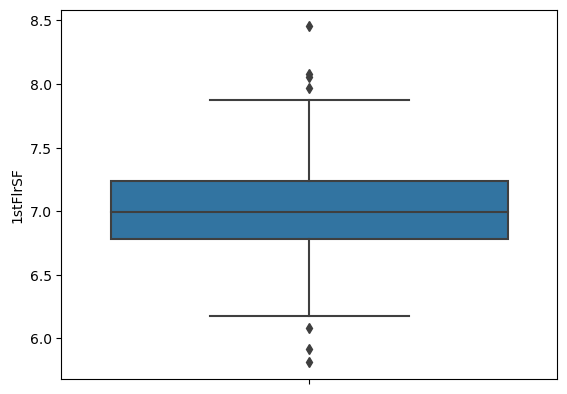

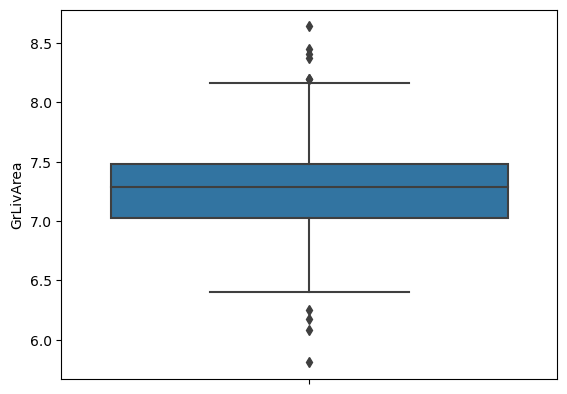

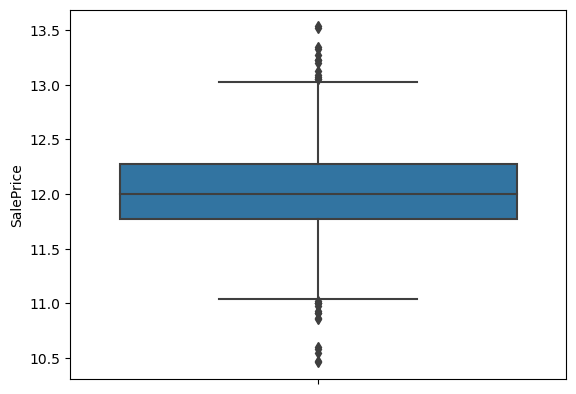

In [46]:
##Outliers - which has very high or low values(a kind of outside range)

for feature in conti_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        sns.boxplot(y=feature,data=data)
        plt.show()

In [50]:
##Categorical Feature

catego_feature = [feature for feature in df.columns if df[feature].dtypes == 'O']

catego_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [51]:
len(catego_feature)

43

In [53]:
print('The number of category of categorical feature is as below: ')
for feature in catego_feature:
    print('{}: {}'.format(feature,df[feature].nunique()))

The number of category of categorical feature is as below: 
MSZoning: 5
Street: 2
Alley: 2
LotShape: 4
LandContour: 4
Utilities: 2
LotConfig: 5
LandSlope: 3
Neighborhood: 25
Condition1: 9
Condition2: 8
BldgType: 5
HouseStyle: 8
RoofStyle: 6
RoofMatl: 8
Exterior1st: 15
Exterior2nd: 16
MasVnrType: 4
ExterQual: 4
ExterCond: 5
Foundation: 6
BsmtQual: 4
BsmtCond: 4
BsmtExposure: 4
BsmtFinType1: 6
BsmtFinType2: 6
Heating: 6
HeatingQC: 5
CentralAir: 2
Electrical: 5
KitchenQual: 4
Functional: 7
FireplaceQu: 5
GarageType: 6
GarageFinish: 3
GarageQual: 5
GarageCond: 5
PavedDrive: 3
PoolQC: 3
Fence: 4
MiscFeature: 4
SaleType: 9
SaleCondition: 6


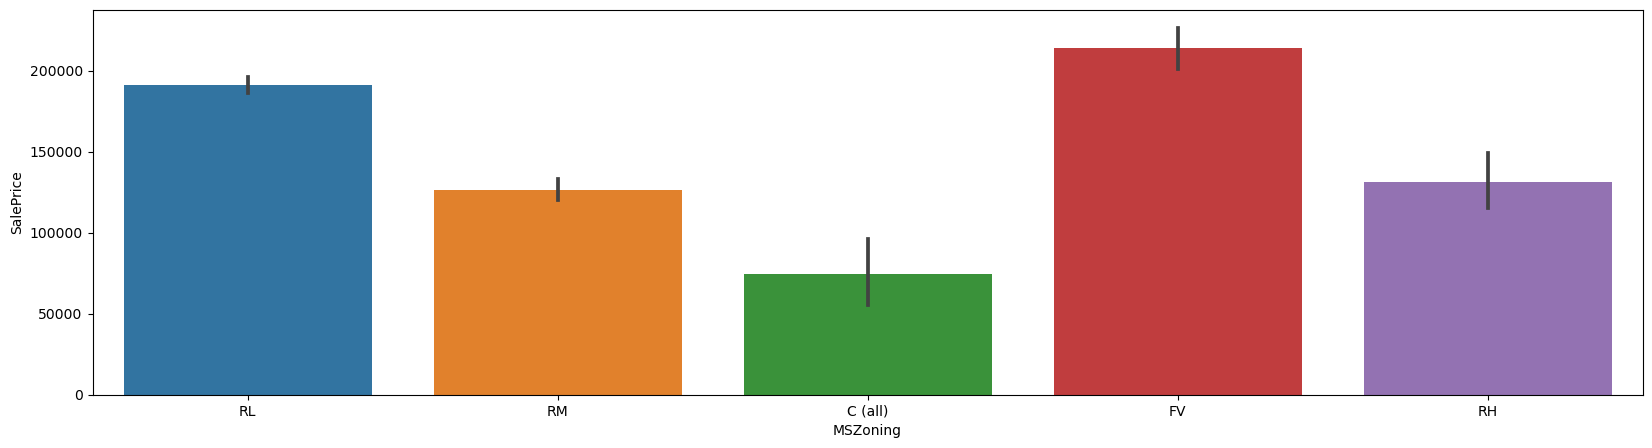

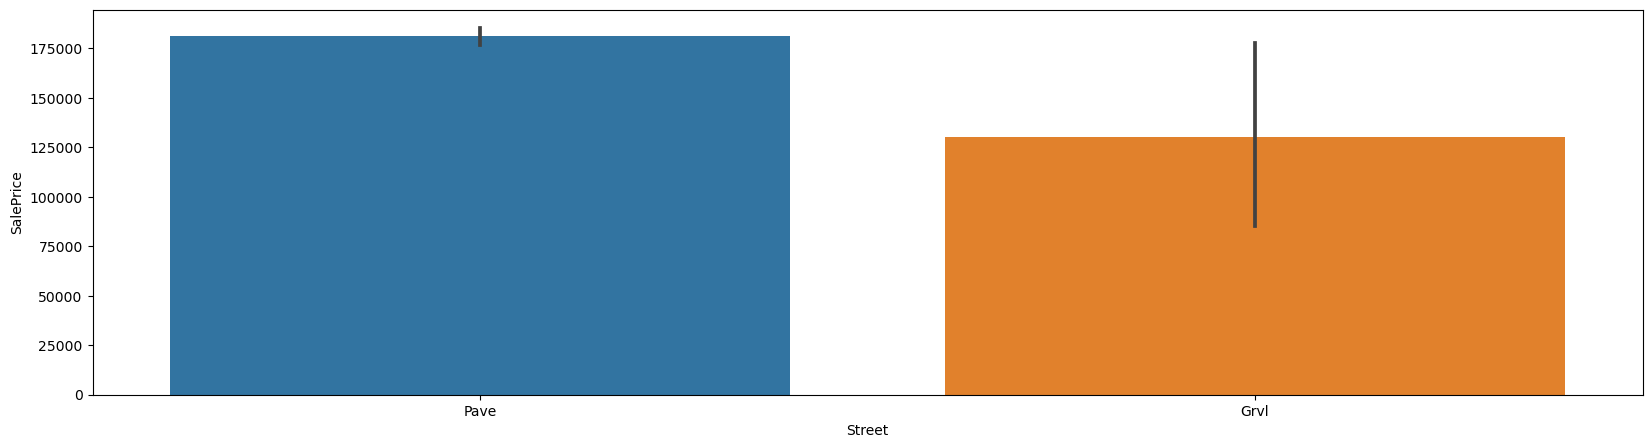

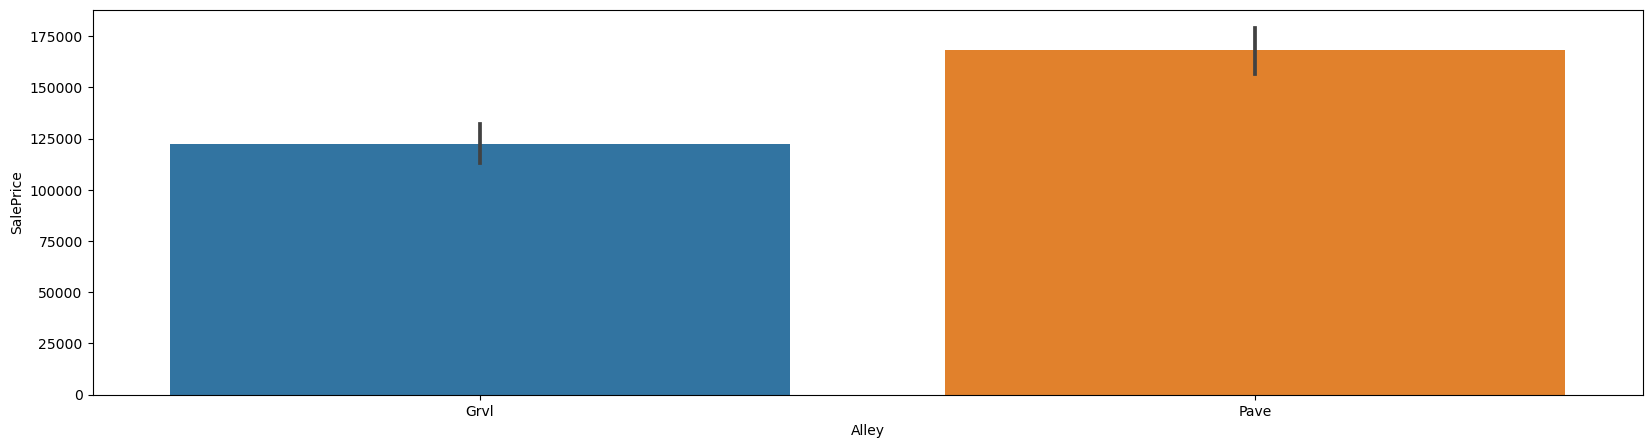

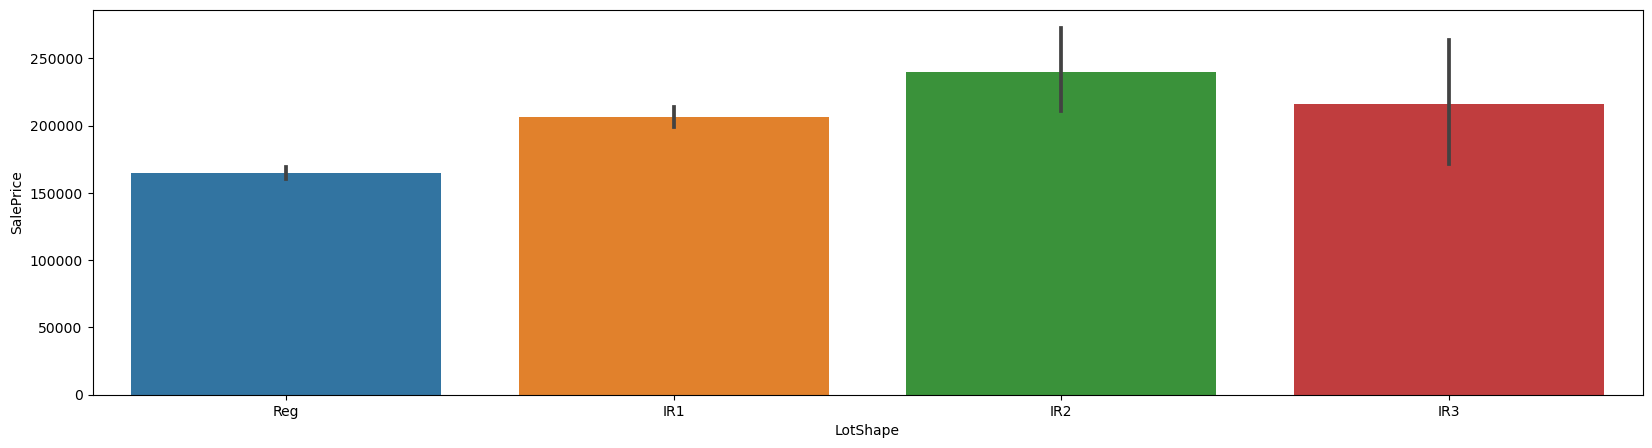

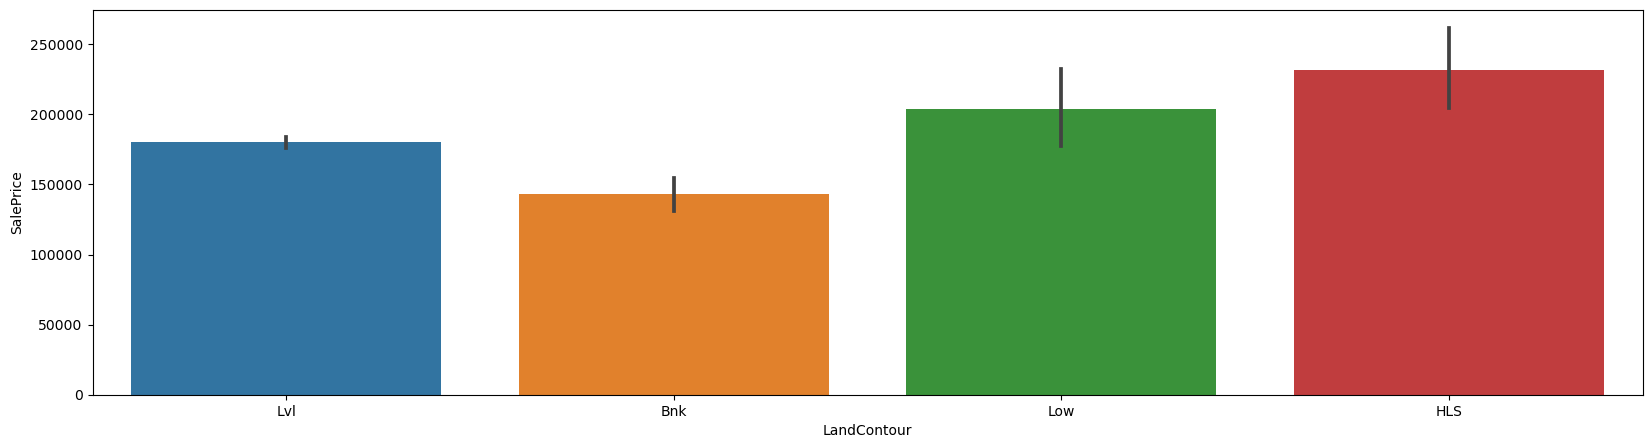

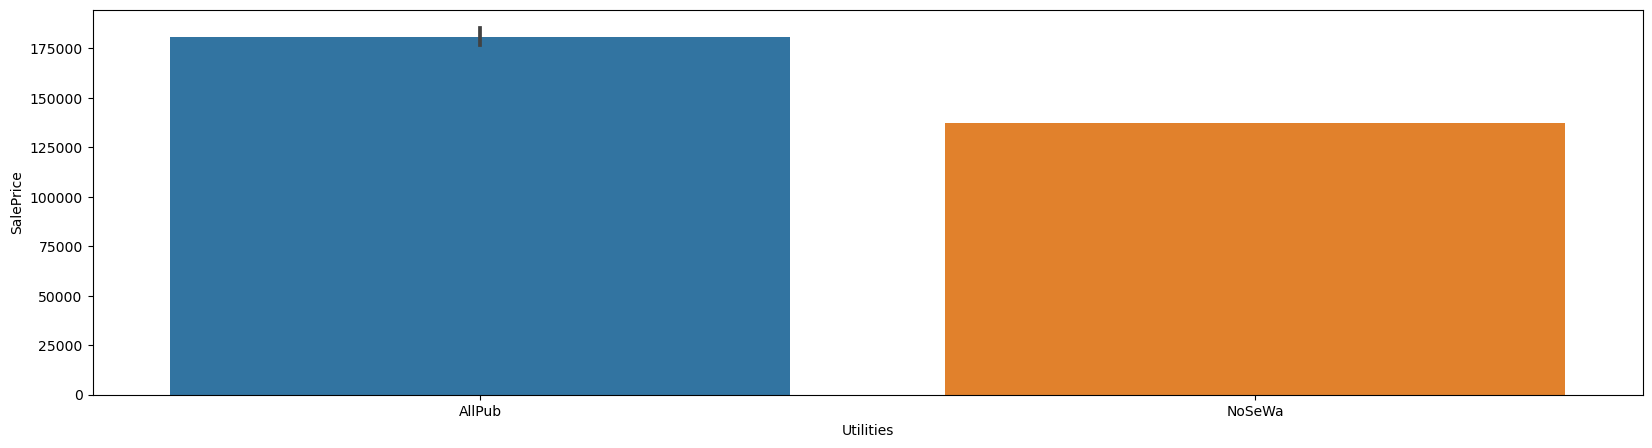

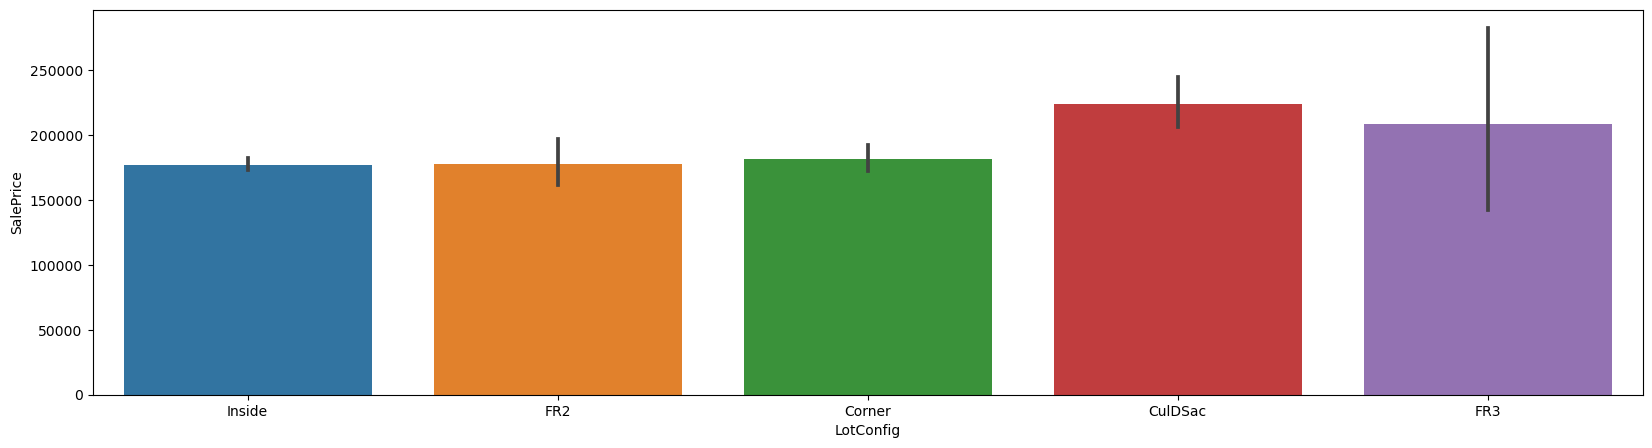

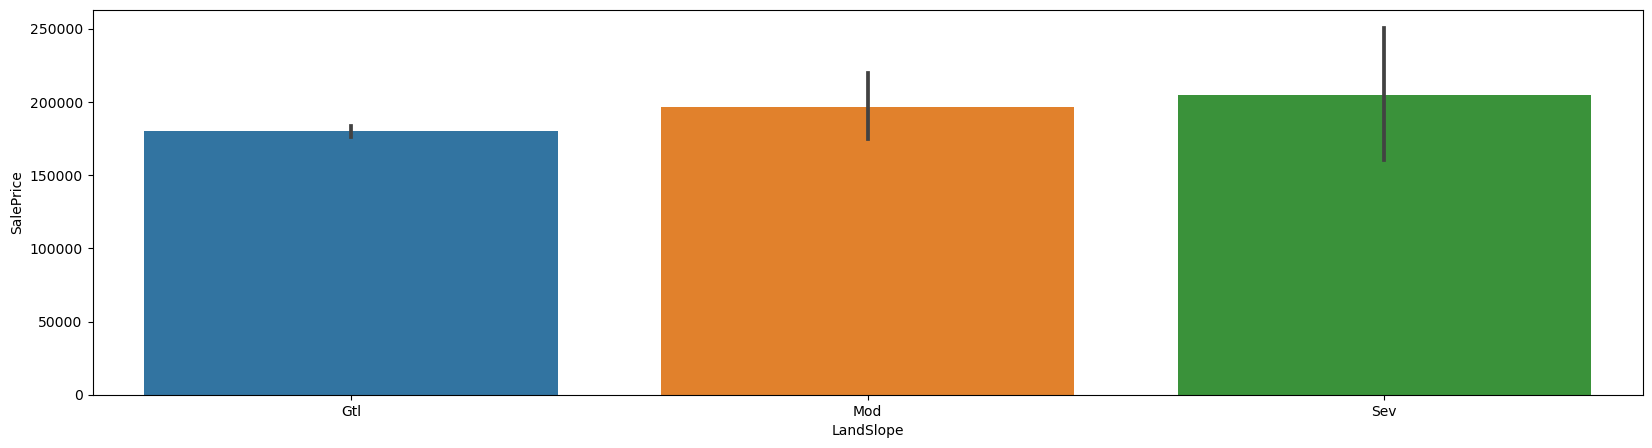

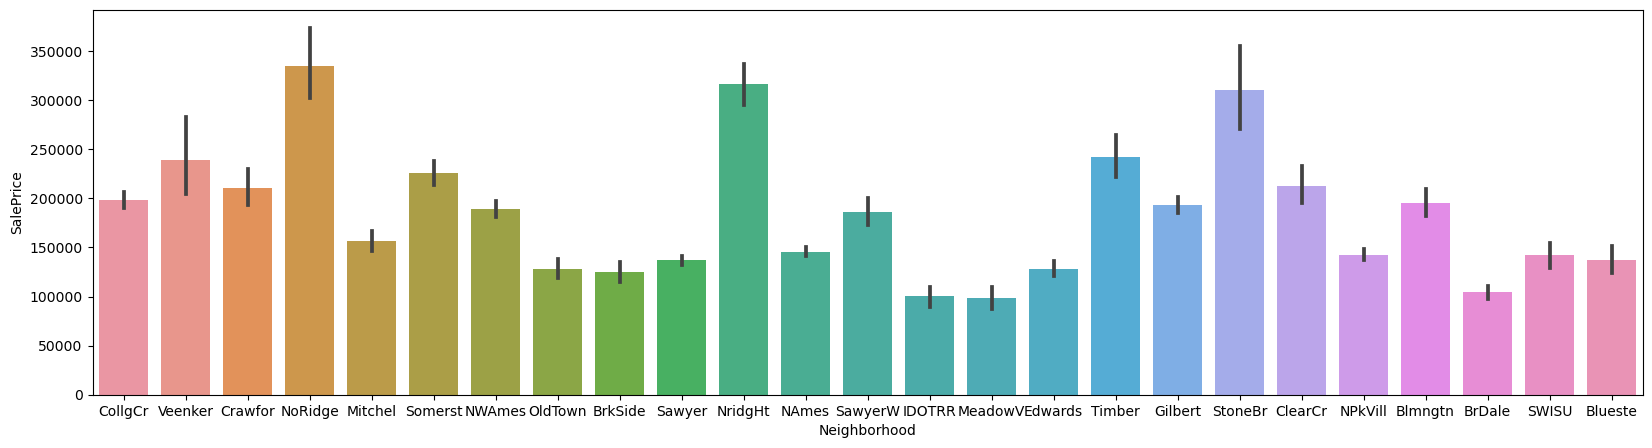

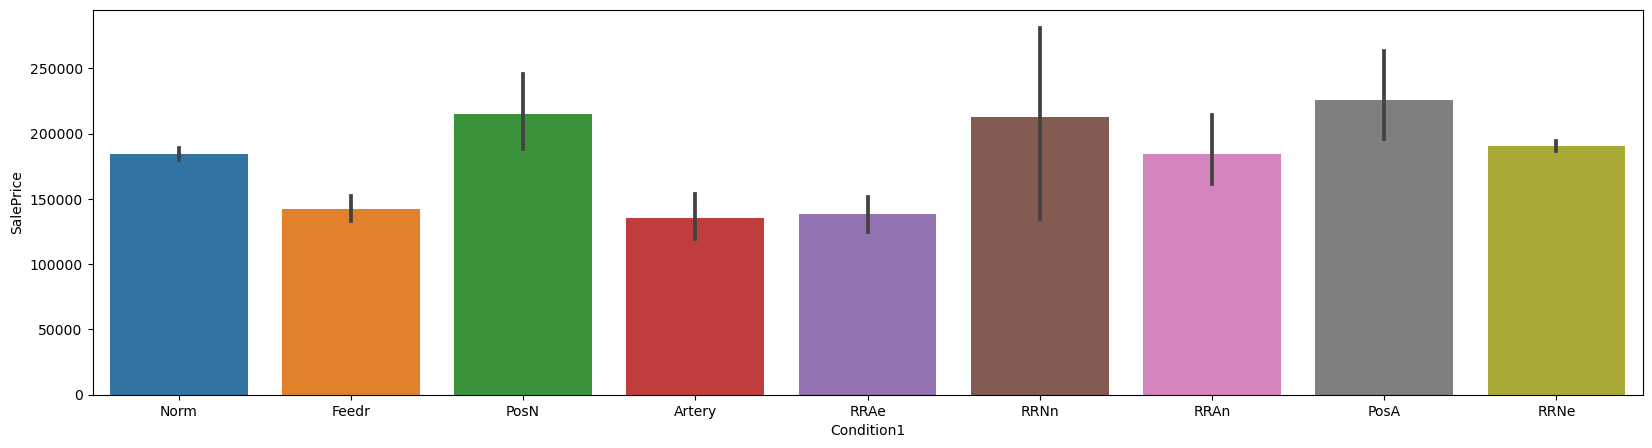

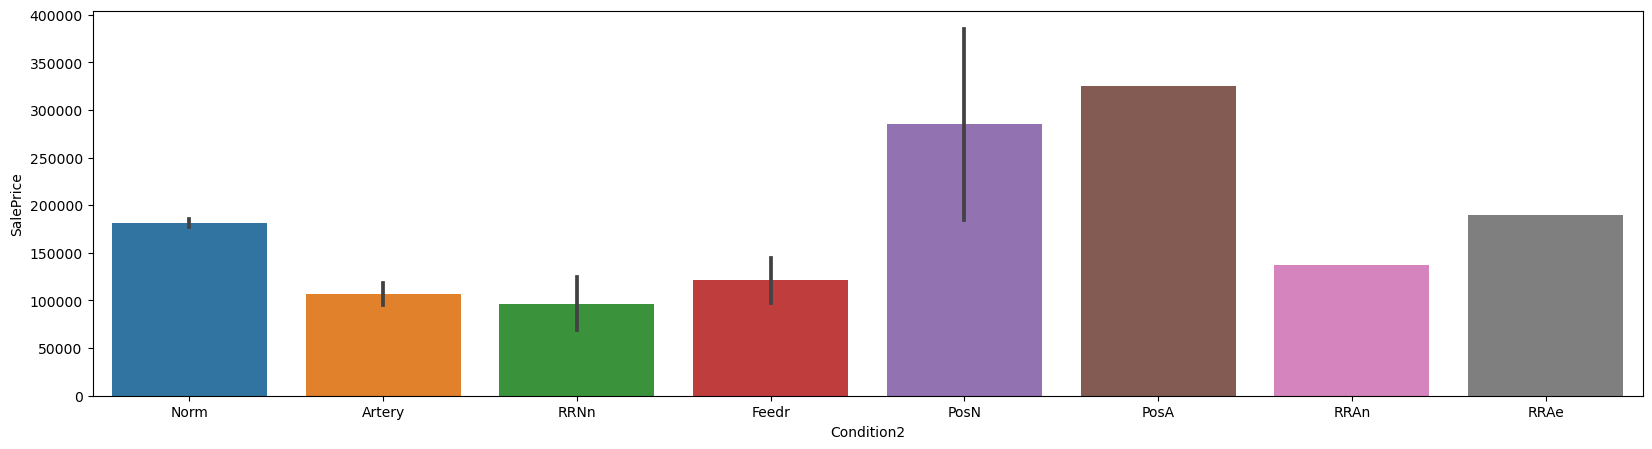

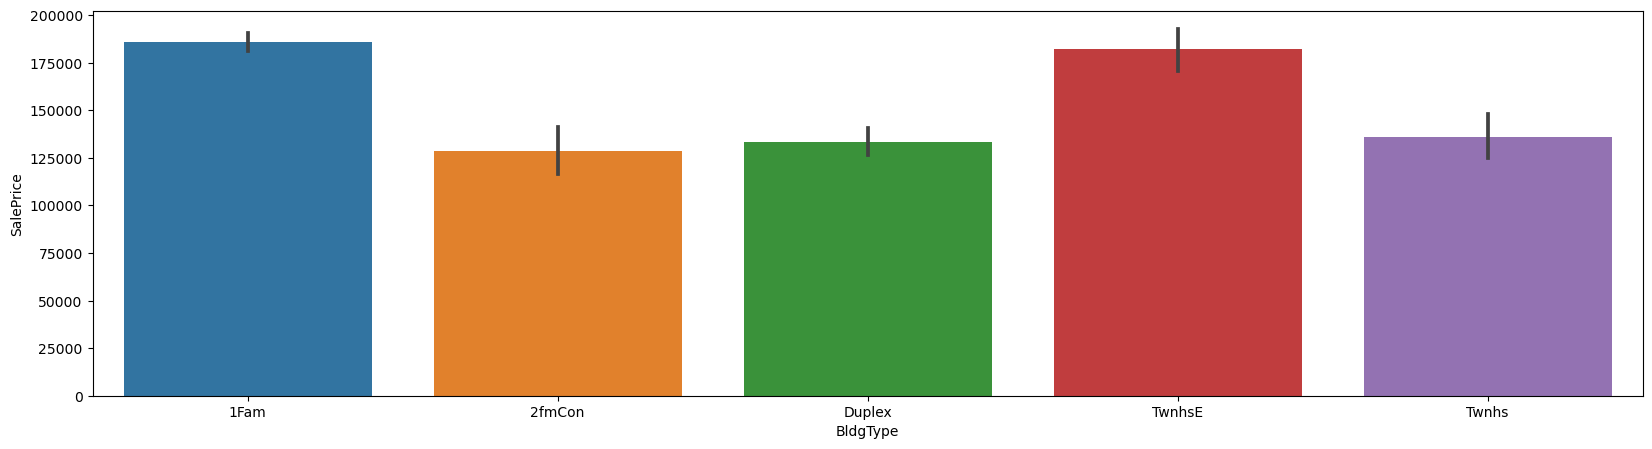

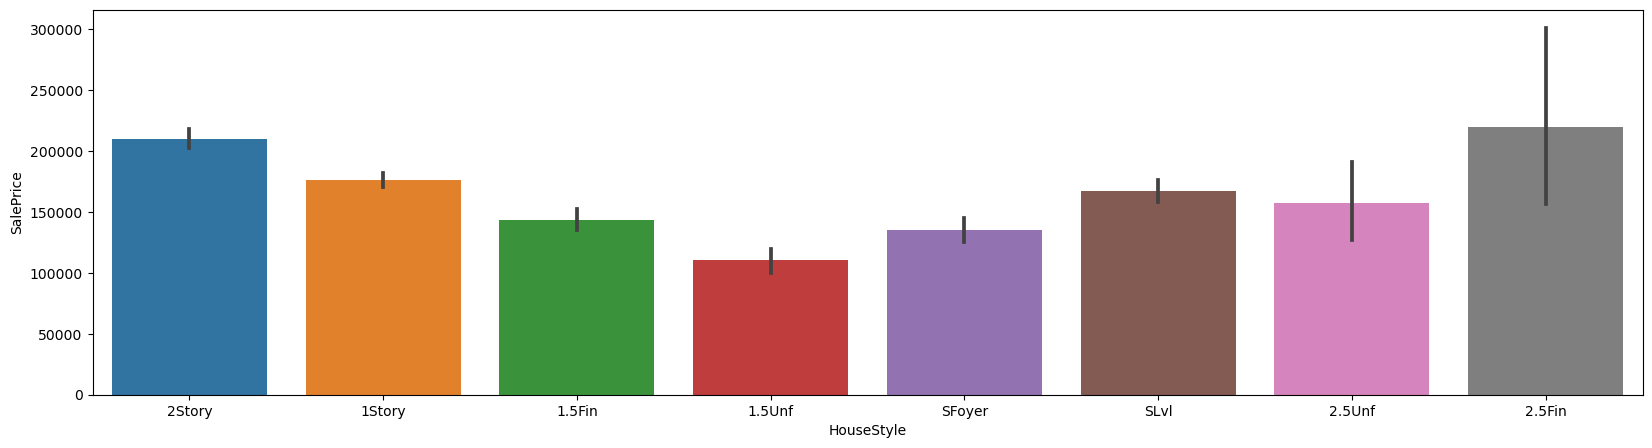

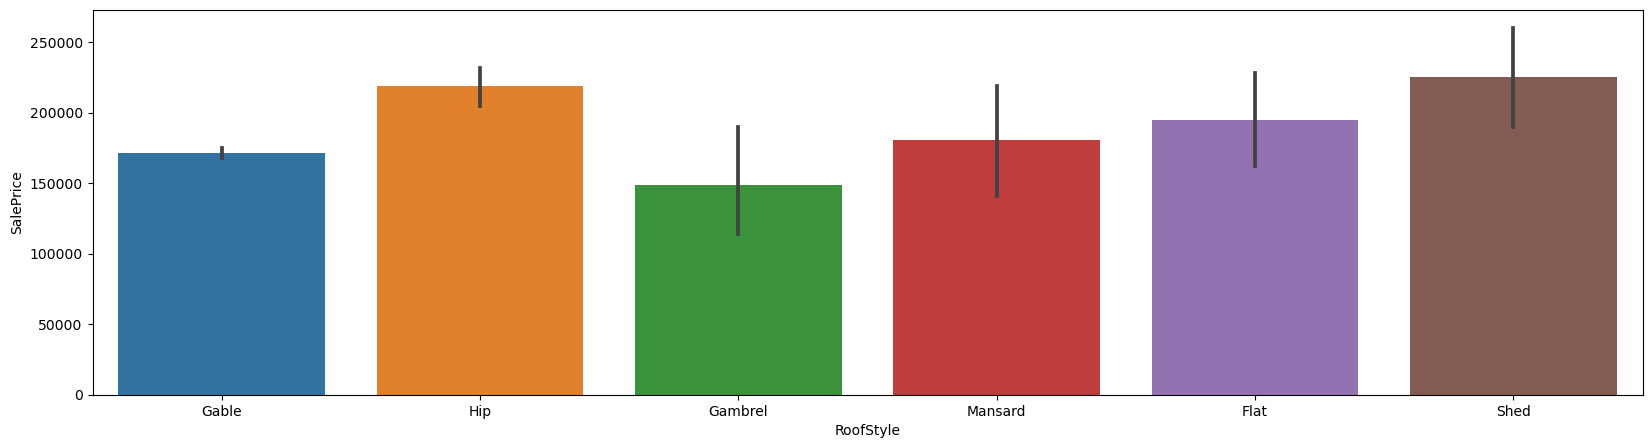

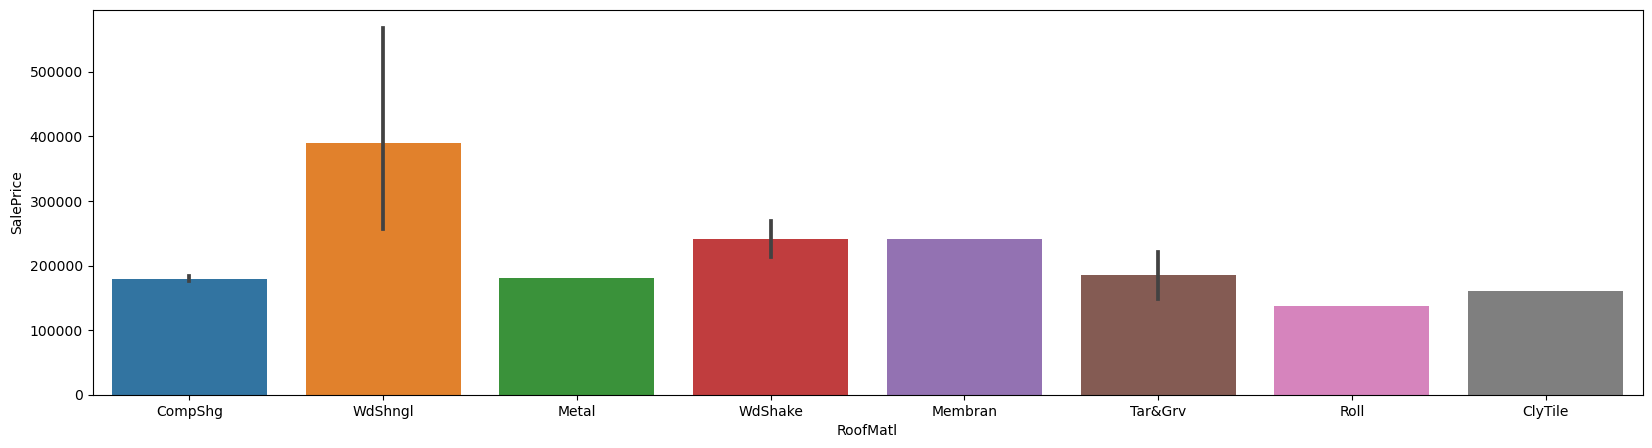

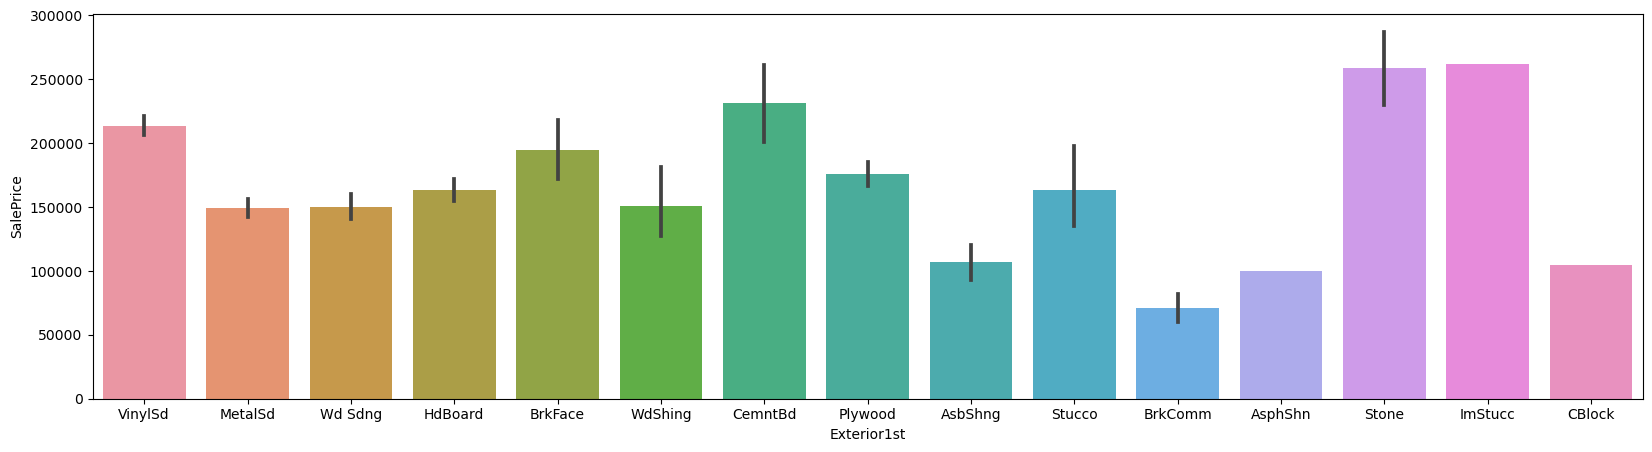

In [ ]:
##relationship between categorical data and salesprice

for feature in catego_feature:
    data=df.copy()
    plt.figure(figsize=(20,5))
    sns.barplot(x=feature,y='SalePrice',data=data)
    plt.show()